In [1]:
import sys
from pathlib import Path
parent_dir = Path.cwd().parent
sys.path.append(str(parent_dir))
sys.path.append('./../../RoboPoint/')

from robopoint_utils import load_model, do_inference, get_coordinates, generate_prompt
from utils import extract_all, visualize_points_on_image, plot_euclidean_bplot

2025-01-26 15:23:59.999349: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-26 15:24:00.397732: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-26 15:24:00.397773: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-26 15:24:00.397801: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-26 15:24:00.417232: I tensorflow/core/platform/cpu_feature_g

In [2]:
model_name = "wentao-yuan/robopoint-v1-vicuna-v1.5-13b"
model, processor, tokenizer = load_model(model_name)

Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

Some weights of the model checkpoint at wentao-yuan/robopoint-v1-vicuna-v1.5-13b were not used when initializing LlavaLlamaForCausalLM: ['model.vision_tower.vision_tower.vision_model.embeddings.class_embedding', 'model.vision_tower.vision_tower.vision_model.embeddings.patch_embedding.weight', 'model.vision_tower.vision_tower.vision_model.embeddings.position_embedding.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm1.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm1.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm2.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm2.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc1.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc1.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc2.bias', 'model.vision_tower.vision_tower.vision_model.encoder

../data/base_experiments/kit_kitchen_8_oven_tray/groundtruth.txt
../data/base_experiments/kit_kitchen_4_fruit/groundtruth.txt
../data/base_experiments/bridge_5_fridge/groundtruth.txt
../data/base_experiments/bridge_7_drawer/groundtruth.txt
../data/base_experiments/bridge_2_can/groundtruth.txt
../data/base_experiments/bridge_1_pot_and_fork/groundtruth.txt
../data/base_experiments/kit_kitchen_6_pot_cam1/groundtruth.txt
../data/base_experiments/bridge_3_potato/groundtruth.txt
../data/base_experiments/bridge_8_cucumber/groundtruth.txt
../data/base_experiments/kit_kitchen_1_banana/groundtruth.txt
../data/base_experiments/kit_kitchen_3_toast/groundtruth.txt
../data/base_experiments/kit_kitchen_2_microwave/groundtruth.txt
../data/base_experiments/kit_kitchen_5_toaster_lever/groundtruth.txt
../data/base_experiments/bridge_4_glass_cup/groundtruth.txt
../data/base_experiments/bridge_6_broccoli/groundtruth.txt
../data/base_experiments/kit_kitchen_7_pot_cam2/groundtruth.txt
Task: 1
pull the oven t

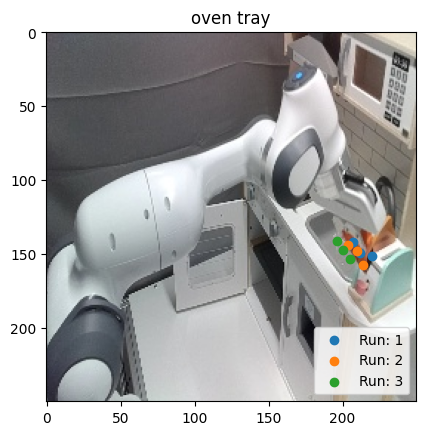

Task: 2
move the fruit from the left stove to the sink

Run: 1 - Output: [(0.500, 0.844), (0.517, 0.819), (0.523, 0.860), (0.534, 0.802), (0.542, 0.844)]
Run: 2 - Output: [(0.492, 0.881), (0.506, 0.842), (0.522, 0.877), (0.528, 0.838), (0.489, 0.923)]
Run: 3 - Output: [(0.497, 0.846), (0.530, 0.869), (0.531, 0.827), (0.512, 0.812), (0.514, 0.890)]


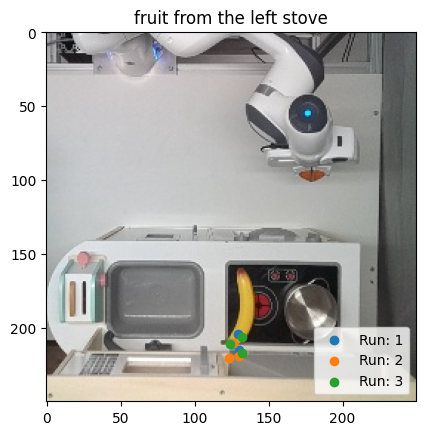

Run: 1 - Output: [(0.544, 0.883), (0.594, 0.869), (0.561, 0.867), (0.578, 0.885)]
Run: 2 - Output: [(0.580, 0.842), (0.598, 0.852), (0.564, 0.858)]
Run: 3 - Output: [(0.577, 0.852), (0.600, 0.848), (0.616, 0.867), (0.595, 0.871)]


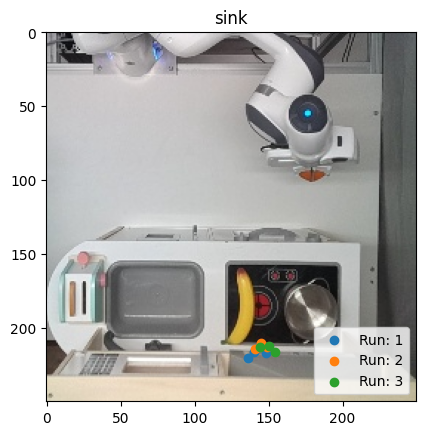

Task: 3
open low fridge
Run: 1 - Output: [(0.455, 0.194), (0.498, 0.202), (0.475, 0.204), (0.439, 0.177), (0.423, 0.194)]
Run: 2 - Output: [(0.459, 0.167), (0.423, 0.173), (0.491, 0.175), (0.442, 0.183), (0.475, 0.194)]
Run: 3 - Output: [(0.487, 0.190), (0.452, 0.192), (0.436, 0.158), (0.419, 0.181), (0.472, 0.169), (0.402, 0.165), (0.453, 0.140)]


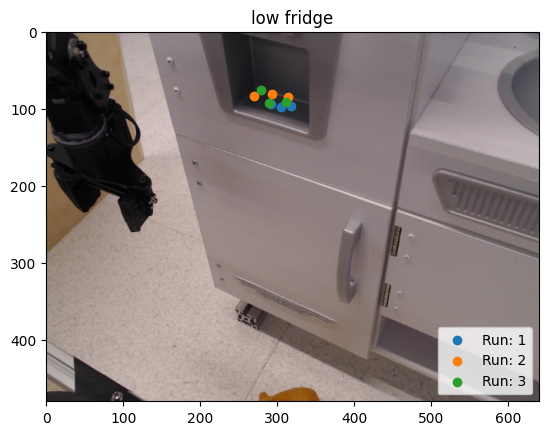

Task: 4
open the drawer

Run: 1 - Output: [(0.067, 0.512), (0.108, 0.531), (0.153, 0.452), (0.166, 0.419), (0.102, 0.454), (0.117, 0.496), (0.059, 0.410), (0.084, 0.494), (0.156, 0.377), (0.139, 0.512), (0.188, 0.394), (0.105, 0.404), (0.180, 0.469), (0.202, 0.425), (0.138, 0.421), (0.198, 0.465), (0.075, 0.440), (0.136, 0.385), (0.103, 0.560), (0.156, 0.540), (0.069, 0.544), (0.125, 0.448), (0.184, 0.517), (0.123, 0.560), (0.092, 0.425), (0.172, 0.560), (0.200, 0.533), (0.169, 0.498), (0.139, 0.479), (0.100, 0.479), (0.053, 0.433), (0.122, 0.362), (0.186, 0.583), (0.155, 0.581), (0.056, 0.467), (0.122, 0.402), (0.170, 0.356), (0.084, 0.398), (0.138, 0.583), (0.195, 0.373), (0.153, 0.400), (0.155, 0.500)]
Run: 2 - Output: [(0.169, 0.515), (0.195, 0.517), (0.212, 0.506), (0.180, 0.535), (0.153, 0.529)]
Run: 3 - Output: [(0.188, 0.506), (0.164, 0.508), (0.150, 0.529), (0.197, 0.527), (0.177, 0.529)]


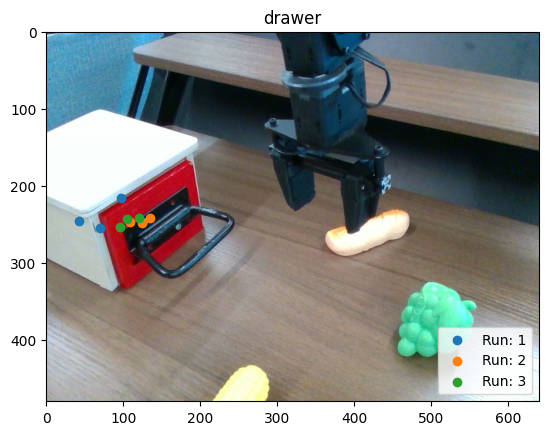

Task: 5
Move the can from the top left of the burner to the bottom left of the burner
Run: 1 - Output: [(0.294, 0.231), (0.336, 0.263), (0.269, 0.250), (0.320, 0.246), (0.269, 0.296), (0.298, 0.292), (0.247, 0.279), (0.319, 0.287), (0.248, 0.240), (0.348, 0.244), (0.284, 0.271)]
Run: 2 - Output: [(0.270, 0.260), (0.289, 0.254), (0.322, 0.256), (0.306, 0.277), (0.255, 0.275)]
Run: 3 - Output: [(0.283, 0.217), (0.248, 0.242), (0.284, 0.254), (0.252, 0.283), (0.250, 0.204), (0.303, 0.242), (0.302, 0.206), (0.270, 0.287)]


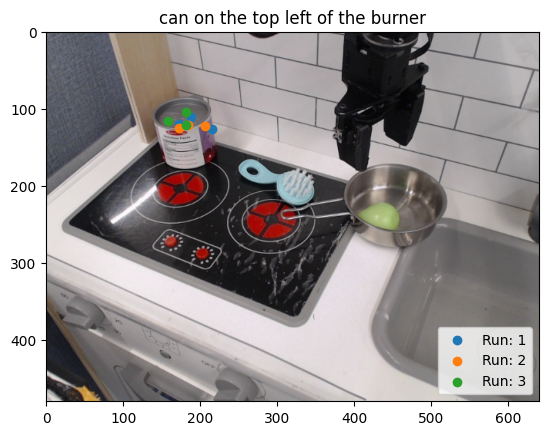

Run: 1 - Output: [(0.261, 0.598), (0.286, 0.600), (0.244, 0.583), (0.270, 0.577)]
Run: 2 - Output: [(0.184, 0.510), (0.159, 0.510), (0.208, 0.504), (0.225, 0.512), (0.144, 0.525)]
Run: 3 - Output: [(0.261, 0.608), (0.234, 0.606), (0.277, 0.594), (0.247, 0.625)]


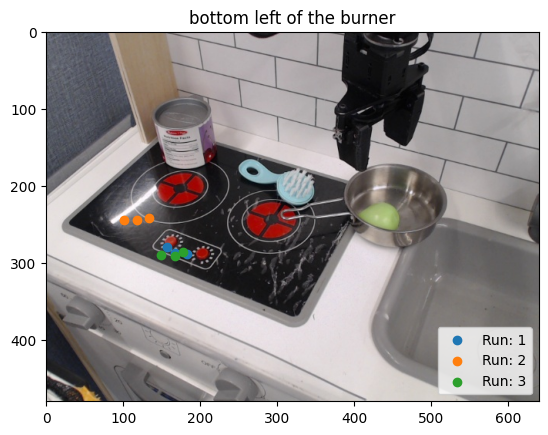

Task: 6
Place the pot to the right of the blue fork.
Run: 1 - Output: [(0.472, 0.323), (0.433, 0.340), (0.438, 0.302), (0.403, 0.304), (0.408, 0.342), (0.498, 0.317), (0.464, 0.294), (0.455, 0.344), (0.487, 0.296)]
Run: 2 - Output: [(0.453, 0.392), (0.445, 0.348), (0.470, 0.369), (0.427, 0.371), (0.489, 0.362), (0.412, 0.346), (0.480, 0.390), (0.409, 0.375), (0.455, 0.325)]
Run: 3 - Output: [(0.455, 0.344), (0.430, 0.335), (0.481, 0.335), (0.412, 0.325), (0.447, 0.323)]


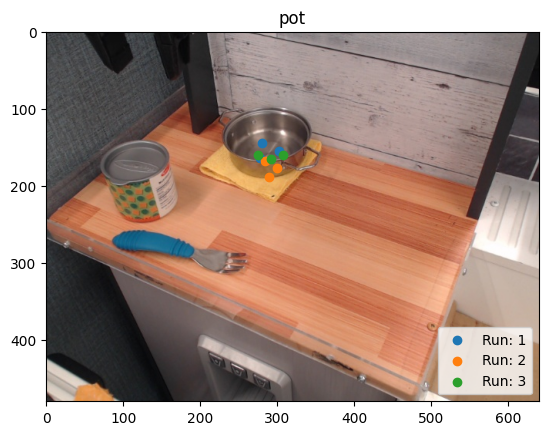

Run: 1 - Output: [(0.520, 0.537), (0.520, 0.590), (0.506, 0.569), (0.503, 0.519), (0.536, 0.565), (0.491, 0.546), (0.537, 0.592)]
Run: 2 - Output: [(0.425, 0.552), (0.441, 0.567), (0.442, 0.531), (0.459, 0.550), (0.416, 0.573), (0.458, 0.571)]
Run: 3 - Output: [(0.436, 0.540), (0.463, 0.519), (0.486, 0.519), (0.416, 0.546), (0.444, 0.517), (0.452, 0.552)]


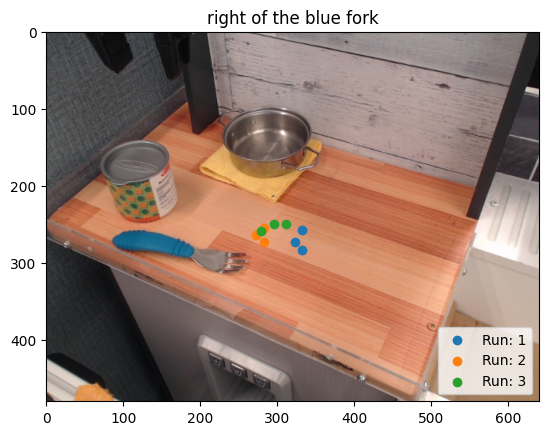

Task: 7
move the pot from the right to the left stove

Run: 1 - Output: [(0.722, 0.827), (0.755, 0.819), (0.786, 0.850), (0.753, 0.869), (0.705, 0.850), (0.787, 0.806), (0.755, 0.777), (0.723, 0.785), (0.786, 0.765), (0.755, 0.735), (0.722, 0.744), (0.758, 0.910), (0.789, 0.892), (0.720, 0.881), (0.753, 0.952), (0.753, 0.700)]
Run: 2 - Output: [(0.745, 0.860), (0.705, 0.869), (0.752, 0.810), (0.706, 0.819), (0.738, 0.775), (0.773, 0.854), (0.770, 0.790), (0.780, 0.896), (0.719, 0.794), (0.741, 0.900), (0.708, 0.758), (0.789, 0.812), (0.738, 0.825), (0.781, 0.754)]
Run: 3 - Output: [(0.741, 0.838), (0.708, 0.871), (0.742, 0.879), (0.706, 0.829), (0.770, 0.860), (0.772, 0.819), (0.775, 0.898), (0.738, 0.796), (0.709, 0.790), (0.773, 0.779), (0.739, 0.756), (0.709, 0.748)]


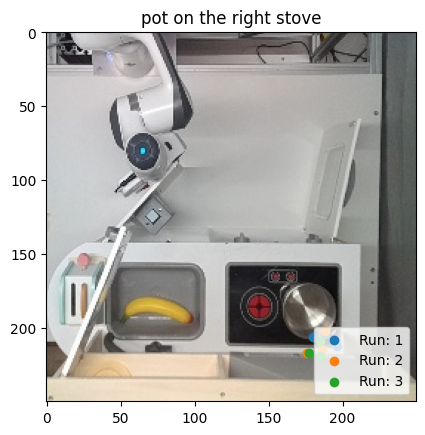

Run: 1 - Output: [(0.292, 0.840), (0.341, 0.840), (0.377, 0.844), (0.319, 0.842), (0.259, 0.850), (0.230, 0.854)]
Run: 2 - Output: [(0.336, 0.771), (0.309, 0.771), (0.386, 0.779), (0.352, 0.798), (0.286, 0.777), (0.369, 0.762), (0.323, 0.796), (0.353, 0.748)]
Run: 3 - Output: [(0.353, 0.765), (0.323, 0.765), (0.377, 0.765), (0.308, 0.742), (0.341, 0.735), (0.291, 0.762), (0.392, 0.748)]


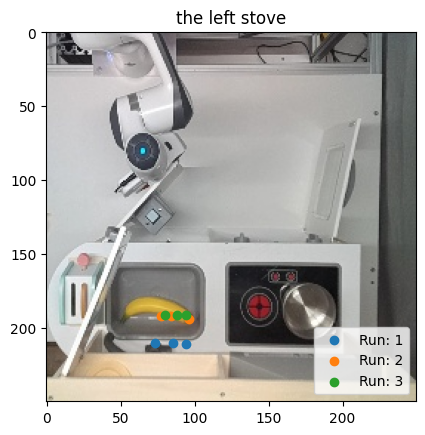

Task: 8
put potato in pot or pan

Run: 1 - Output: [(0.478, 0.306), (0.459, 0.290), (0.445, 0.312), (0.494, 0.287)]
Run: 2 - Output: [(0.489, 0.312), (0.463, 0.304), (0.450, 0.273), (0.477, 0.283)]
Run: 3 - Output: [(0.150, 0.113), (0.113, 0.106), (0.134, 0.131), (0.167, 0.125), (0.183, 0.108)]


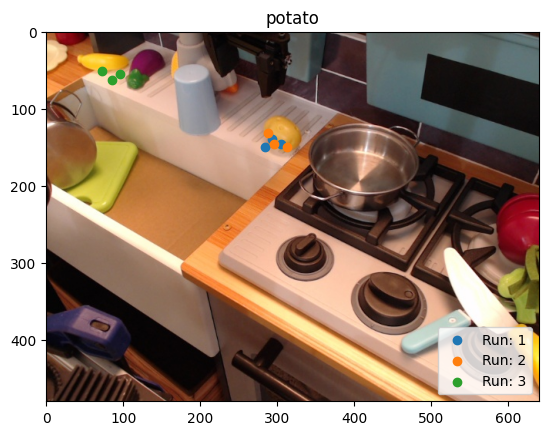

Run: 1 - Output: [(0.608, 0.350), (0.670, 0.371), (0.625, 0.373), (0.653, 0.396), (0.689, 0.383), (0.588, 0.348), (0.641, 0.356), (0.606, 0.390), (0.673, 0.410), (0.691, 0.427), (0.655, 0.333)]
Run: 2 - Output: [(0.631, 0.365), (0.675, 0.388), (0.586, 0.421), (0.630, 0.438), (0.695, 0.423), (0.661, 0.431), (0.584, 0.375), (0.611, 0.408), (0.661, 0.356), (0.608, 0.367), (0.698, 0.379), (0.647, 0.394), (0.575, 0.454), (0.600, 0.450), (0.697, 0.338), (0.645, 0.463), (0.614, 0.473), (0.678, 0.452), (0.664, 0.317), (0.630, 0.323), (0.570, 0.398), (0.602, 0.327)]
Run: 3 - Output: [(0.684, 0.362), (0.623, 0.400), (0.658, 0.392), (0.608, 0.427), (0.583, 0.369), (0.641, 0.427), (0.586, 0.419), (0.689, 0.404), (0.553, 0.381), (0.617, 0.356), (0.650, 0.348), (0.558, 0.421), (0.672, 0.429), (0.592, 0.329), (0.616, 0.465), (0.650, 0.465), (0.555, 0.340), (0.588, 0.460), (0.614, 0.315), (0.539, 0.402), (0.667, 0.329), (0.633, 0.323), (0.602, 0.388), (0.572, 0.317), (0.648, 0.308)]


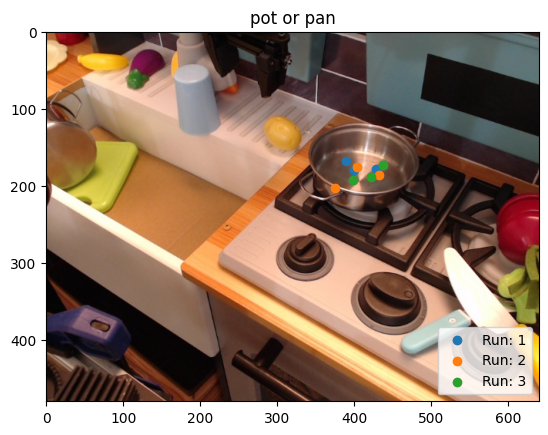

Task: 9
take cucumber out of cup

Run: 1 - Output: [(0.422, 0.781), (0.439, 0.758), (0.405, 0.760), (0.430, 0.721), (0.403, 0.796), (0.455, 0.742), (0.414, 0.738)]
Run: 2 - Output: [(0.422, 0.719), (0.400, 0.719), (0.405, 0.677), (0.433, 0.683), (0.388, 0.694), (0.419, 0.658), (0.386, 0.735)]
Run: 3 - Output: [(0.420, 0.679), (0.438, 0.658), (0.405, 0.665), (0.422, 0.717), (0.422, 0.640), (0.405, 0.696)]


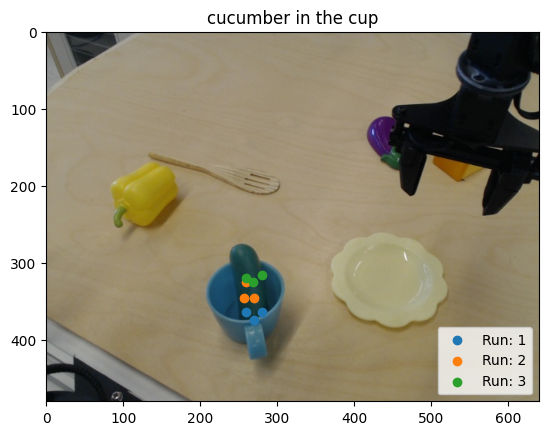

Task: 10
move the banana from the left stove to the sink

Run: 1 - Output: [(0.514, 0.890), (0.533, 0.869), (0.511, 0.840), (0.547, 0.898), (0.548, 0.844)]
Run: 2 - Output: [(0.522, 0.873), (0.542, 0.898), (0.506, 0.898), (0.537, 0.846), (0.509, 0.838)]
Run: 3 - Output: [(0.520, 0.842), (0.536, 0.817), (0.505, 0.819), (0.547, 0.854), (0.552, 0.794)]


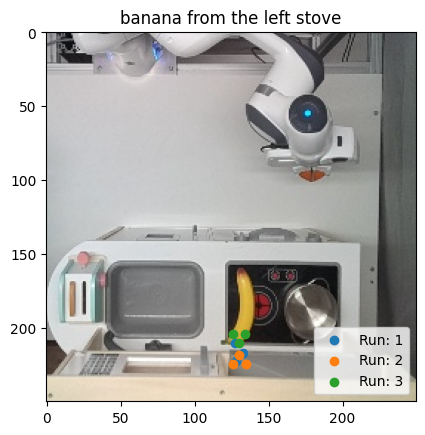

Run: 1 - Output: [(0.594, 0.869), (0.613, 0.856), (0.628, 0.875), (0.580, 0.852)]
Run: 2 - Output: [(0.631, 0.835), (0.608, 0.842), (0.650, 0.846), (0.666, 0.863)]
Run: 3 - Output: [(0.589, 0.896), (0.606, 0.879), (0.573, 0.879), (0.622, 0.896)]


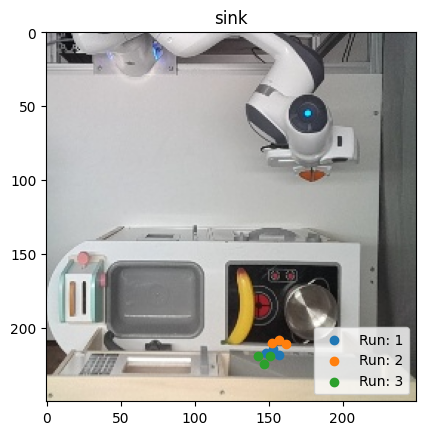

Task: 11
pick up the toast and put it to the sink

Run: 1 - Output: [(0.289, 0.842), (0.255, 0.842), (0.308, 0.819), (0.325, 0.842), (0.272, 0.825), (0.341, 0.825), (0.292, 0.802)]
Run: 2 - Output: [(0.294, 0.829), (0.345, 0.806), (0.375, 0.800), (0.331, 0.842), (0.316, 0.815), (0.359, 0.840), (0.391, 0.819), (0.305, 0.863), (0.327, 0.781), (0.347, 0.767), (0.375, 0.758)]
Run: 3 - Output: [(0.258, 0.827), (0.281, 0.815), (0.237, 0.840), (0.297, 0.831), (0.266, 0.860), (0.220, 0.856)]


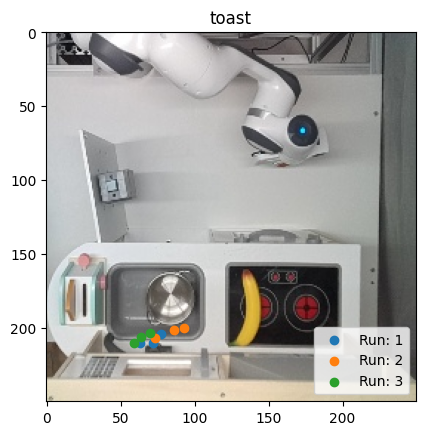

Run: 1 - Output: [(0.223, 0.819), (0.244, 0.838), (0.258, 0.815), (0.281, 0.812), (0.239, 0.796), (0.270, 0.835), (0.222, 0.854)]
Run: 2 - Output: [(0.281, 0.819), (0.347, 0.821), (0.319, 0.810), (0.302, 0.829), (0.350, 0.781), (0.334, 0.852), (0.361, 0.846), (0.312, 0.773), (0.300, 0.871), (0.334, 0.754), (0.369, 0.804), (0.317, 0.890), (0.333, 0.894)]
Run: 3 - Output: [(0.277, 0.825), (0.256, 0.842), (0.292, 0.844), (0.241, 0.823), (0.273, 0.863), (0.258, 0.804)]


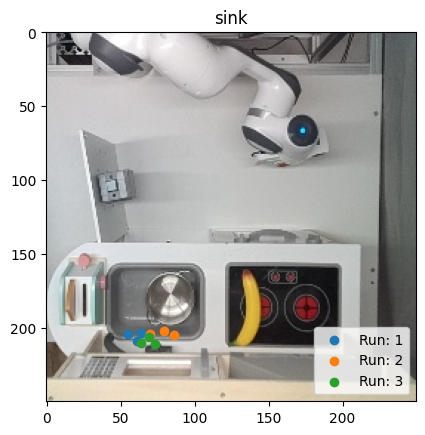

Task: 12
close the microwave

Run: 1 - Output: [(0.650, 0.367), (0.683, 0.367), (0.634, 0.390), (0.617, 0.371), (0.669, 0.385)]
Run: 2 - Output: [(0.787, 0.227), (0.773, 0.265), (0.772, 0.198), (0.775, 0.304), (0.791, 0.283), (0.792, 0.188)]
Run: 3 - Output: [(0.769, 0.212), (0.752, 0.242), (0.784, 0.242), (0.748, 0.202), (0.787, 0.200)]


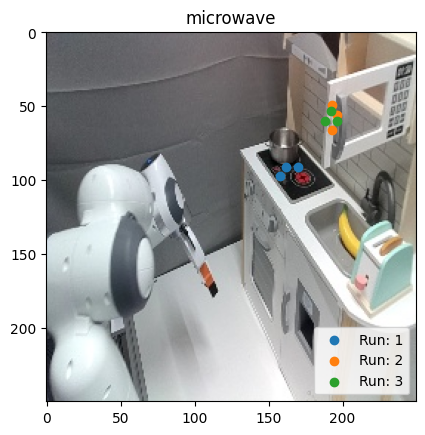

Task: 13
push the toaster lever

Run: 1 - Output: [(0.758, 0.650), (0.734, 0.650), (0.709, 0.648), (0.773, 0.665)]
Run: 2 - Output: [(0.266, 0.927), (0.309, 0.923), (0.289, 0.921), (0.250, 0.910)]
Run: 3 - Output: [(0.705, 0.698), (0.683, 0.692), (0.720, 0.683), (0.667, 0.675)]


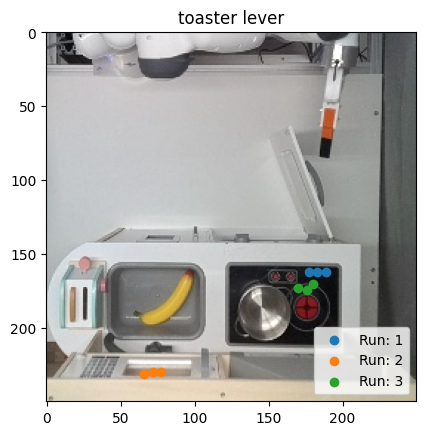

Task: 14
pick up glass cup
Run: 1 - Output: [(0.295, 0.373), (0.314, 0.396), (0.330, 0.369), (0.280, 0.398), (0.345, 0.390), (0.311, 0.346), (0.280, 0.352)]
Run: 2 - Output: [(0.636, 0.600), (0.605, 0.594), (0.588, 0.613), (0.572, 0.594), (0.620, 0.617), (0.653, 0.610)]
Run: 3 - Output: [(0.319, 0.427), (0.336, 0.398), (0.359, 0.406), (0.303, 0.406), (0.344, 0.435), (0.375, 0.385), (0.322, 0.369)]


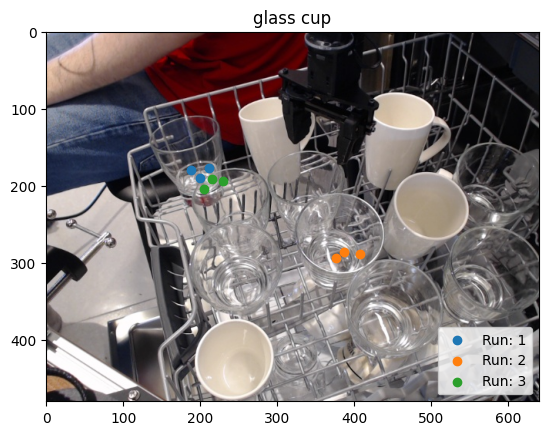

Task: 15
take the broccoli and put it between the two right burners
Run: 1 - Output: [(0.388, 0.415), (0.358, 0.408), (0.339, 0.417), (0.373, 0.396), (0.323, 0.402)]
Run: 2 - Output: [(0.444, 0.494), (0.427, 0.479), (0.461, 0.483)]
Run: 3 - Output: [(0.459, 0.492), (0.439, 0.490), (0.475, 0.479)]


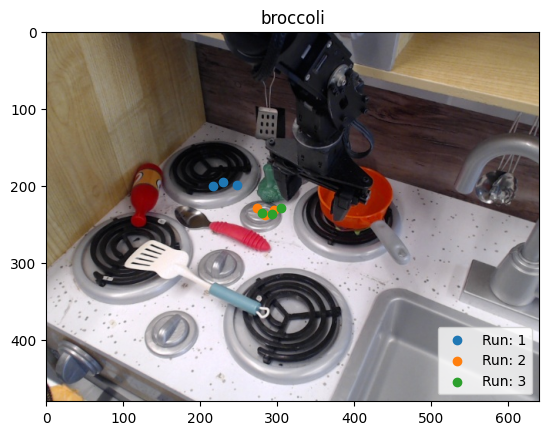

Run: 1 - Output: [(0.480, 0.529), (0.464, 0.515), (0.495, 0.515), (0.445, 0.506)]
Run: 2 - Output: [(0.459, 0.565), (0.444, 0.548), (0.428, 0.529), (0.442, 0.573)]
Run: 3 - Output: [(0.473, 0.508), (0.500, 0.502), (0.452, 0.508), (0.484, 0.487)]


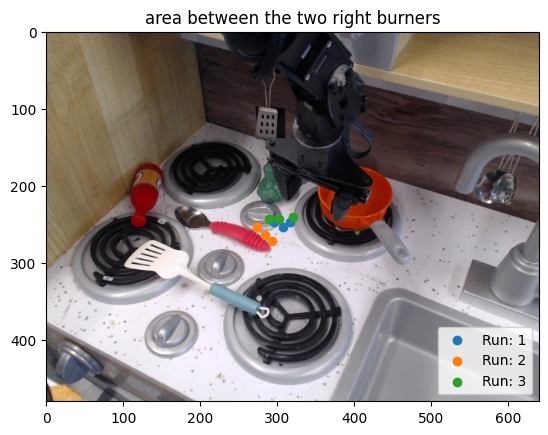

Task: 16
move the pot from the left to the right stove

Run: 1 - Output: [(0.652, 0.304), (0.622, 0.310), (0.683, 0.302), (0.636, 0.279)]
Run: 2 - Output: [(0.630, 0.319), (0.672, 0.325), (0.655, 0.308), (0.647, 0.346)]
Run: 3 - Output: [(0.658, 0.321), (0.669, 0.279), (0.636, 0.304), (0.630, 0.344), (0.688, 0.298)]


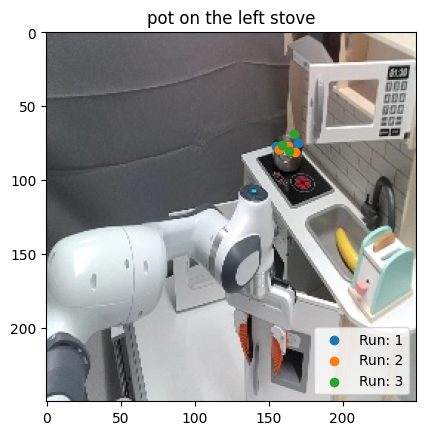

Run: 1 - Output: [(0.683, 0.438), (0.637, 0.410), (0.652, 0.435), (0.619, 0.427), (0.698, 0.417), (0.667, 0.417)]
Run: 2 - Output: [(0.666, 0.408), (0.622, 0.406), (0.695, 0.421), (0.648, 0.425), (0.606, 0.425), (0.680, 0.442), (0.711, 0.404)]
Run: 3 - Output: [(0.680, 0.444), (0.644, 0.419), (0.681, 0.404), (0.716, 0.438), (0.613, 0.421), (0.648, 0.458), (0.613, 0.463), (0.647, 0.381), (0.683, 0.483), (0.648, 0.494), (0.708, 0.400), (0.614, 0.383), (0.681, 0.365)]


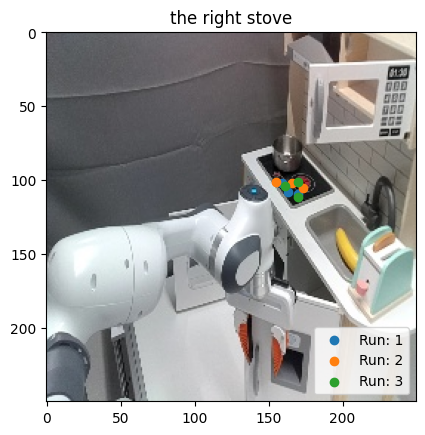

In [11]:
from PIL import Image

tasks, images, ground_truths, object_list = extract_all("../data/base_experiments")

NUMBER_OF_RUNS = 3

for i in range(len(tasks)):   
    print(f"Task: {i + 1}")
    print(tasks[i])

    image_path = images[i]
    task = tasks[i]
    objects = object_list[i]

    with Image.open(image_path) as image:
        width, height = image.size
        for object in objects:
            labels = []
            coordinate_list = []
            prompt = generate_prompt(object, "Locate several points within the space of the ")
            for j in range(NUMBER_OF_RUNS):
                labels.append(f"Run: {j + 1}")
                output = do_inference(image, prompt, model, processor, tokenizer, 0.2)
                coordinates = get_coordinates(output, width, height)[:3]
                coordinate_list.append(coordinates)
            
                print(f"Run: {j + 1} - Output: {output}")
            visualize_points_on_image(image, labels, coordinate_list, object)